# Importing Packages

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# Loading Dataset

In [ ]:
df= pd.read_csv("Iris.csv")

In [ ]:
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [ ]:
df.tail()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica
149,150,5.9,3.0,5.1,1.8,Iris-virginica


In [ ]:
df= df.drop(columns=["Id"])

In [ ]:
#Ranges, DataTypes, Total Columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [ ]:
#Basic Stats Information
df.describe()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [ ]:
# Number of Samples in Each Class
df["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

# Preprocessing the Dataset

In [ ]:
df.isnull().sum()

SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

In [ ]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
145    False
146    False
147    False
148    False
149    False
Length: 150, dtype: bool

# Exploratory Data Analysis

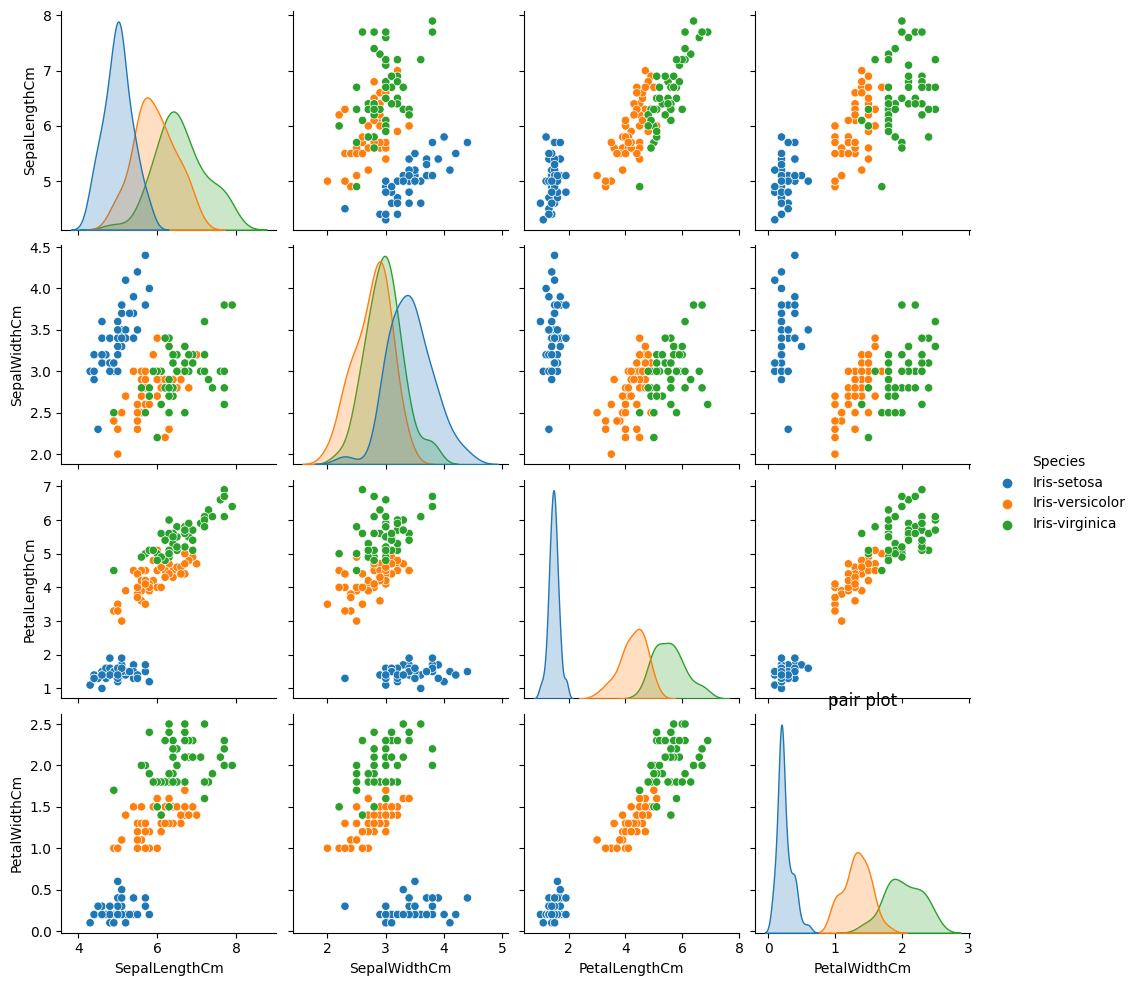

In [ ]:
sns.pairplot(df , hue='Species')                  #hue parameter for different colors otherwise same colors
plt.title('pair plot')
plt.show()

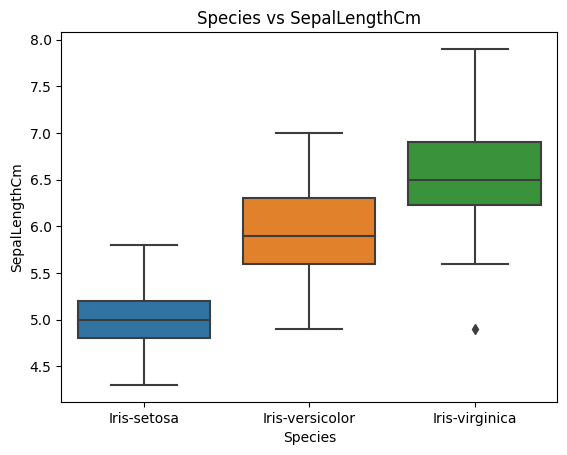

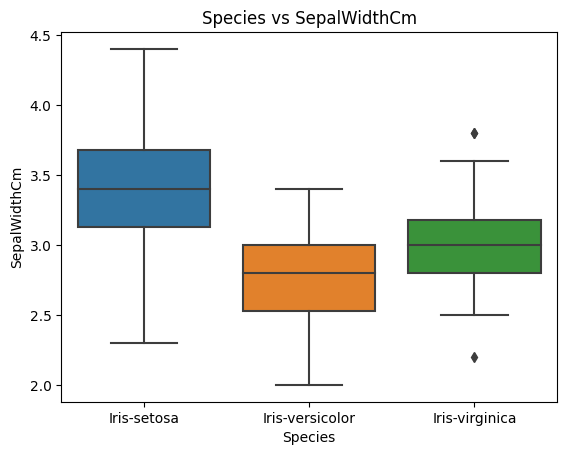

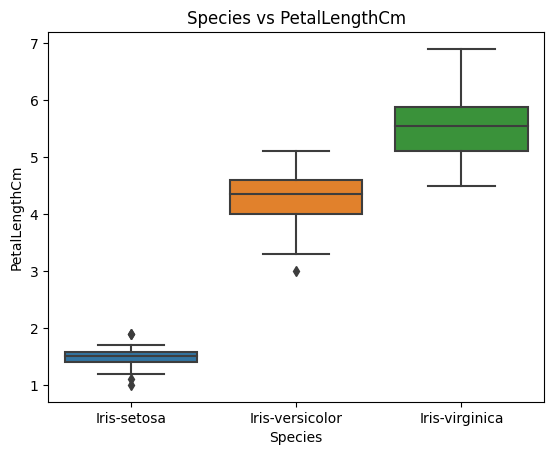

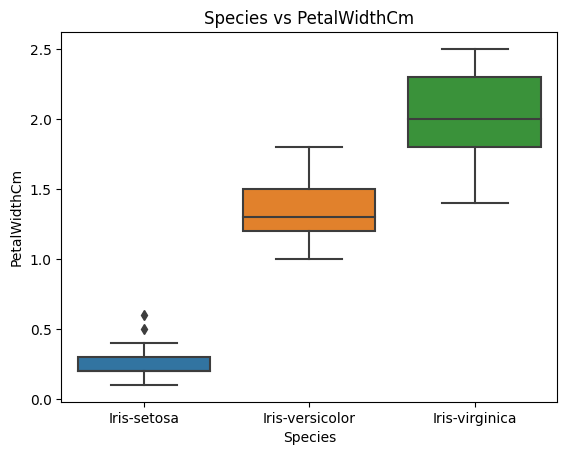

In [ ]:
for i in df.columns:
  if "Species" !=i:
     sns.boxplot(x=df["Species"],y=i,data=df)
     plt.xlabel("Species")
     plt.ylabel(i)
     plt.title("Species vs %s" %i)
     plt.show()


# Correlation Matrix

In [ ]:
df.corr()

<ipython-input-13-2f6f6606aa2c>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
SepalLengthCm,1.000000,-0.109369,0.871754,0.817954
SepalWidthCm,-0.109369,1.000000,-0.420516,-0.356544
PetalLengthCm,0.871754,-0.420516,1.000000,0.962757
PetalWidthCm,0.817954,-0.356544,0.962757,1.000000


<ipython-input-14-f0c14cf86fec>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True, ax=ax,cmap="Pastel1")


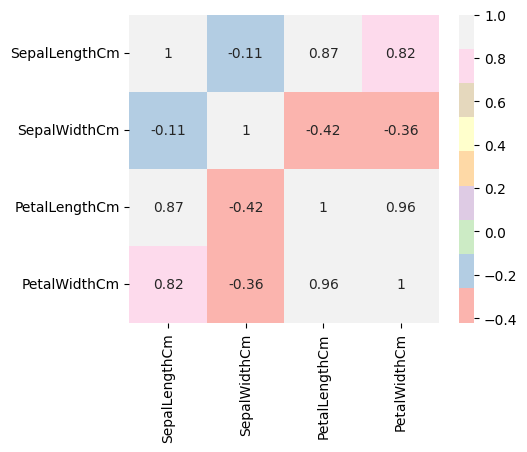

In [ ]:
fig , ax = plt.subplots(figsize=(5,4))
sns.heatmap(df.corr(),annot=True, ax=ax,cmap="Pastel1")
plt.show()

# Label Encoder


In [ ]:
# to convert categorical data into numerical values
from sklearn.preprocessing import LabelEncoder
LE=LabelEncoder()

In [ ]:
df["Species"]= LE.fit_transform(df["Species"])
df.head()

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


# Model Training

In [ ]:
from  sklearn.model_selection import train_test_split
x=df.drop(columns=["Species"])
y=df["Species"]
#test 30%
#train 70%
x_train,x_test,y_train,y_test =train_test_split(x,y,test_size=0.30)

# Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression
model= LogisticRegression()

In [ ]:
# Model Training
model.fit(x_train,y_train)

LogisticRegression()

In [ ]:
# Accuracy
print("Accuracy: ", model.score(x_test,y_test) * 100)

Accuracy:  100.0


# KNeighbour Classifier

In [ ]:
#Model DAta
from sklearn.neighbors import KNeighborsClassifier
model=KNeighborsClassifier()

In [ ]:
model.fit(x_train,y_train)

KNeighborsClassifier()

In [ ]:
# Accuracy
print("Accuracy: ", model.score(x_test,y_test) * 100)

Accuracy:  100.0


In [ ]:
from sklearn.metrics import confusion_matrix

# PRINT THE CONFUSION MATRIX
y_pred = model.predict(x_test)
print("Confusion Matrix")
cm = confusion_matrix(y_test , y_pred)
print(cm)

Confusion Matrix
[[16  0  0]
 [ 0 15  0]
 [ 0  0 14]]


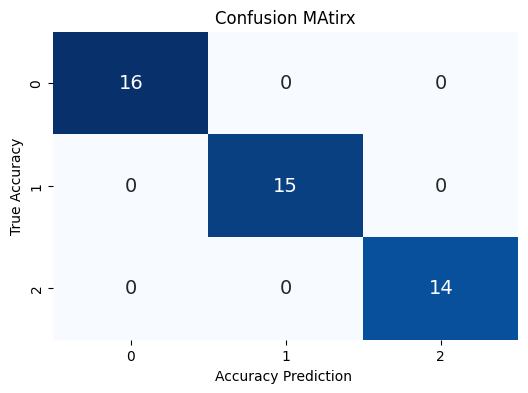

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,cmap="Blues",fmt="d",cbar=False,annot=True,annot_kws={"size":14})
plt.title("Confusion MAtirx")
plt.xlabel("Accuracy Prediction ")
plt.ylabel("True Accuracy")
plt.show()

# Decision Tree Classifier

In [ ]:
# Model Training
from sklearn.tree import DecisionTreeClassifier
model= DecisionTreeClassifier()

In [ ]:
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [ ]:
# Accuracy
print("Accuracy:" , model.score(x_test, y_test)*100)

Accuracy: 97.77777777777777


In [ ]:
from sklearn.metrics import confusion_matrix

# PRINT THE CONFUSION MATRIX
y_pred = model.predict(x_test)
print("Confusion Matrix")
cm = confusion_matrix(y_test , y_pred)
print(cm)

Confusion Matrix
[[16  0  0]
 [ 0 15  0]
 [ 0  1 13]]


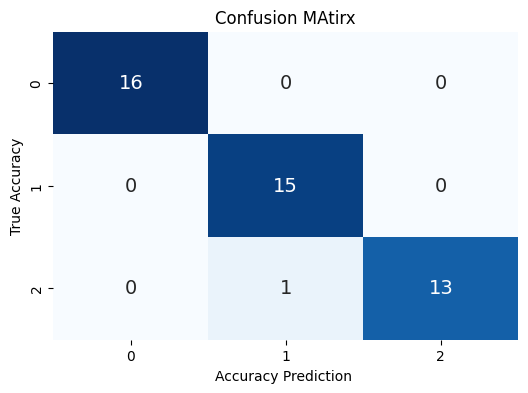

In [ ]:
plt.figure(figsize=(6,4))
sns.heatmap(cm,cmap="Blues",fmt="d",cbar=False,annot=True,annot_kws={"size":14})
plt.title("Confusion MAtirx")
plt.xlabel("Accuracy Prediction ")
plt.ylabel("True Accuracy")
plt.show()